In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.linear_model import SGDClassifier as classifier


In [26]:
data= pd.read_csv(r"/Users/namanparuthi/Downloads/smoking_driking_dataset_Ver01.csv")

In [27]:
data.describe()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,...,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000
mean,47.614491,162.240625,63.284050,81.233358,0.980834,0.978429,1.031495,1.030476,122.432498,76.052627,...,56.936800,113.037692,132.141751,14.229824,1.094224,0.860467,25.989308,25.755051,37.136347,1.608122
std,14.181339,9.282957,12.514241,11.850323,0.605949,0.604774,0.174650,0.171892,14.543148,9.889365,...,17.238479,35.842812,102.196985,1.584929,0.437724,0.480530,23.493386,26.308599,50.424153,0.818507
min,20.000000,130.000000,25.000000,8.000000,0.100000,0.100000,1.000000,1.000000,67.000000,32.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000
25%,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,...,46.000000,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000
75%,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,...,66.000000,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000
max,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,2.000000,2.000000,273.000000,185.000000,...,8110.000000,5119.000000,9490.000000,25.000000,6.000000,98.000000,9999.000000,7210.000000,999.000000,3.000000


In [28]:
data['SMK_stat_type_cd'].value_counts()

SMK_stat_type_cd
1    602441
3    213954
2    174951
Name: count, dtype: int64

In [29]:
data.drop(['sex','DRK_YN','height', 'sight_left', 'sight_right', 'hear_left', 'hear_right', 'urine_protein'], inplace=True, axis=1)


In [30]:
data.groupby('SMK_stat_type_cd').mean()

,age,weight,waistline,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP
SMK_stat_type_cd,,,,,,,,,,,,,,,
1,48.455401,59.306272,79.001125,121.177911,74.916407,98.471651,195.336906,59.258090,113.364130,115.055730,13.638717,0.803322,24.680925,22.813524,27.426485
2,50.112632,69.406891,85.312877,125.345011,78.059588,104.173711,194.951243,53.824900,112.836686,147.418752,14.967969,0.965003,28.196804,29.959320,47.043515
3,43.203960,69.477808,84.182930,123.583527,77.610842,102.857245,196.672154,52.945241,112.282888,167.759654,15.290647,0.935891,27.868313,30.599811,56.375763


In [31]:
y= data.loc[:,"SMK_stat_type_cd"]
x=data.loc[:, ('age', 'weight', 'waistline','SBP', 'DBP','BLDS','tot_chole','HDL_chole','LDL_chole','triglyceride','hemoglobin','serum_creatinine','gamma_GTP')]
x1=data.loc[:,('triglyceride')]
x2=data.loc[:,('gamma_GTP')]

In [32]:
#normalising X 

import scipy
X=scipy.stats.zscore(x)

In [33]:
print(X)

             age    weight  waistline       SBP       DBP      BLDS  \
0      -0.889514  0.936210   0.739781 -0.167261  0.399153 -0.058910   
1      -1.242090  1.335755   0.655395  0.520349  0.601391  0.230586   
2      -0.536938  0.936210   0.824167 -0.167261 -0.612034 -0.100267   
3       0.168215  1.335755   0.824167  1.551763  1.106985 -0.224337   
4       0.168215 -0.262425  -0.104078  1.070436  0.601391  0.023803   
...          ...       ...        ...       ...       ...       ...   
991341 -0.184361  1.335755   0.916992 -0.579826  0.399153 -0.513833   
991342 -0.889514  0.936210   0.402238 -0.236022  0.702510 -0.720616   
991343 -0.536938 -1.061515  -1.116709 -0.854870 -0.612034 -0.431120   
991344 -1.594666 -0.262425  -0.779165 -0.236022 -0.207559 -1.299608   
991345  0.168215  0.536665   0.781974  0.726631  0.298035 -0.058910   

        tot_chole  HDL_chole  LDL_chole  triglyceride  hemoglobin  \
0       -0.066141  -0.518422   0.361643     -0.392788    1.810919   
1        

In [34]:
x.shape, y.shape

((991346, 13), (991346,))

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=99)

In [37]:
x_train.shape, y_train.shape

((793076, 13), (793076,))

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
le = LinearRegression()

In [40]:
le.fit(x_train, y_train)

LinearRegression()

In [41]:
y_pred = le.predict(x_test)


In [42]:
y_pred

array([1.73244647, 1.70674352, 1.90420843, ..., 1.07691505, 1.22894054,
       1.38145831])

In [43]:
from sklearn.metrics import mean_squared_error

In [44]:
mean_squared_error(y_test,y_pred)


0.4980335786601208

In [45]:
if len(x_train) > len(y_train):
    x_value = x_train[:len(y_train)]
else:
    y_train = y_train[:len(x_train)]

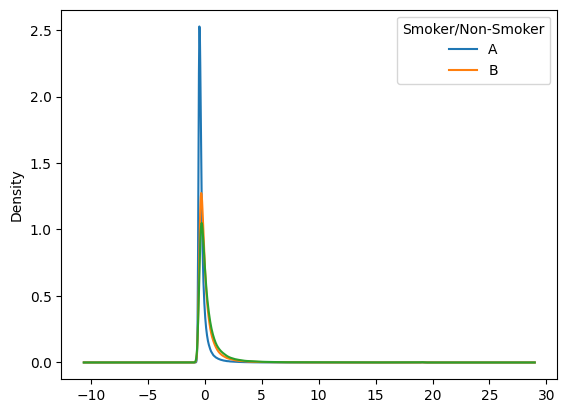

In [46]:
data_truecopy=data.copy()
data_truecopy=scipy.stats.zscore(data_truecopy)
data_truecopy.groupby('SMK_stat_type_cd')["gamma_GTP"].plot(kind='kde')
plt.legend(['A', 'B'], title='Smoker/Non-Smoker')


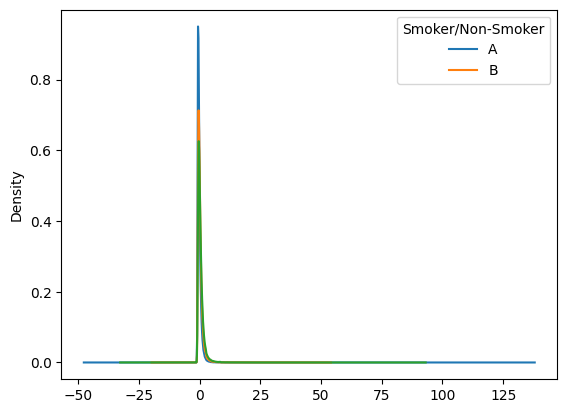

In [47]:
data_truecopy=data.copy()
data_truecopy=scipy.stats.zscore(data_truecopy)
data_truecopy.groupby('SMK_stat_type_cd')["triglyceride"].plot(kind='kde')
plt.legend(['A', 'B'], title='Smoker/Non-Smoker')

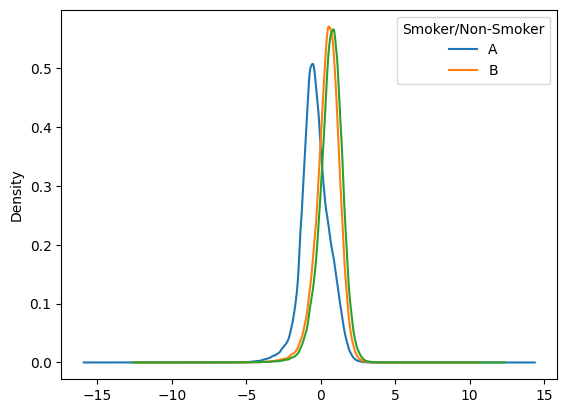

In [49]:
data_truecopy=data.copy()
data_truecopy=scipy.stats.zscore(data_truecopy)
data_truecopy.groupby('SMK_stat_type_cd')["hemoglobin"].plot(kind='kde')
plt.legend(['A', 'B'], title='Smoker/Non-Smoker')